___
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://media.istockphoto.com/id/1493874000/es/vector/ilustraci%C3%B3n-de-medicina-preventiva.jpg?s=612x612&w=0&k=20&c=A3E4XsVlmY0Q7P1WQJFBenx2uqldGBL2BLK0cTKbWT0=" width="400px" height="180px" />


# <font color= #bbc28d> **EXAMEN 3** </font>
#### <font color= #2E9AFE> `Proyecto 3 - Modelo para predecir el nivel de severidad de una enfermedad`</font>
- <Strong> Diana Valdivia, Esteban Berumen, Roi Jared & Sarah Beltran </Strong>
- <Strong> Fecha </Strong>: 23/04/2025



___

<p style="text-align:right;"> Imagen recuperada de: https://media.istockphoto.com/id/1493874000/es/vector/ilustraci%C3%B3n-de-medicina-preventiva.jpg?s=612x612&w=0&k=20&c=A3E4XsVlmY0Q7P1WQJFBenx2uqldGBL2BLK0cTKbWT0=</p>

## <font color= #bbc28d> **Objetivo** </font>
El objetivo del proyecto es utilizar técnicas de aprendizaje automático supervisado para construir un modelo capaz de predecir el `nivel de severidad` de una enfermedad. Se utilizará una base de datos que contiene información clínica y factores de riesgo relacionados a dicha enfermedad. 

## <font color= #bbc28d> **Análisis General - EDA** </font>

In [3]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px

In [4]:
# Cargar los datos
df = pd.read_csv('Datasets/train_data.csv')
df.head()

,Age,Sex,TCh,HCh,LCh,Tr,BPS,Sm,Diabetes,Pred
0,50,Male,272,68,188,82,124,Non-smoker,No,High
1,29,Female,275,68,183,84,129,Non-smoker,No,High
2,50,Male,268,55,189,111,119,Non-smoker,No,High
3,78,Female,194,50,120,94,113,Non-smoker,No,High
4,63,Male,229,35,182,214,160,Smoker,Yes,High


In [5]:
# Comprobar si existen valores nulos
df.isnull().sum()

Age         0
Sex         0
TCh         0
HCh         0
LCh         0
Tr          0
BPS         0
Sm          0
Diabetes    0
Pred        0
dtype: int64

No contamos con datos nulos, por lo que no habrá que realizar alguna imputación.

In [6]:
# Seleccionar solo columnas numéricas
df_numericas = df.select_dtypes(include='number').columns

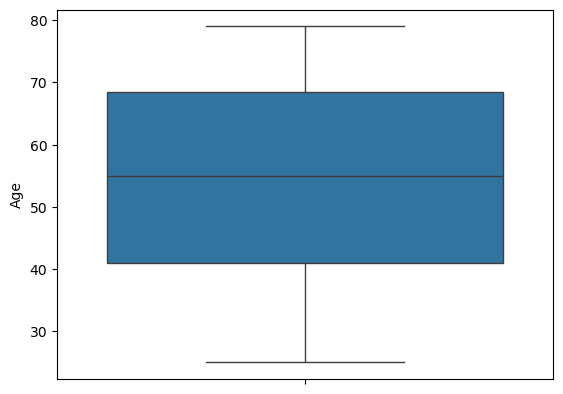

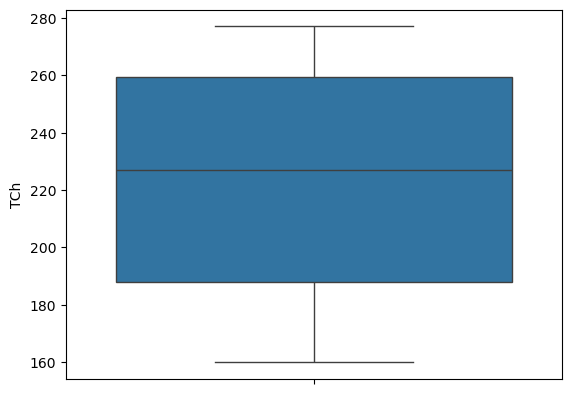

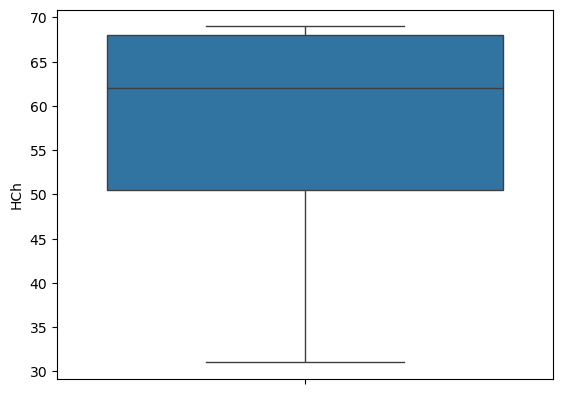

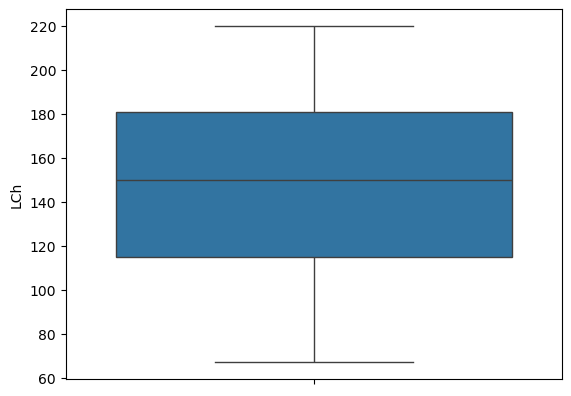

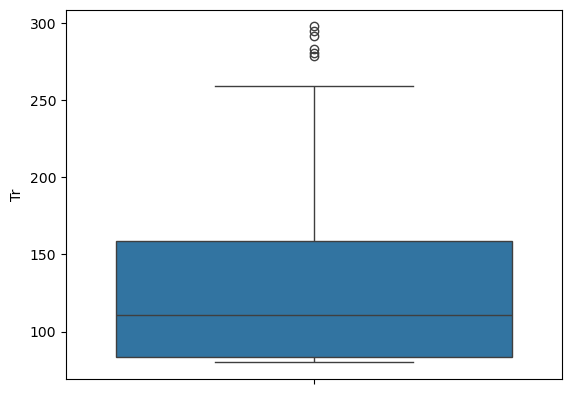

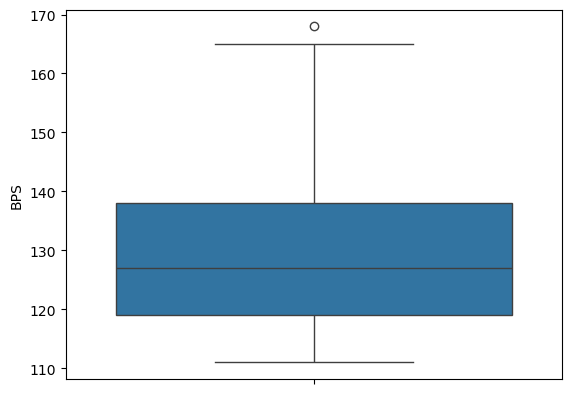

In [7]:
# Verificar si hay datos atípicos
for i in df_numericas:
    sns.boxplot(df[i])
    plt.show()

Contamos con algunos datos atípicos en la columna `Tr` la cuál creemos que hace referencia a los `Triglicéridos`. Los valores atípicos rondan entre los 250 y los 300 que si bien son niveles **altos** e irregulares en personas "sanas", no son valores imposibles de obtener en un estudio si es que cuentas con otro tipo de factores como obesidad o diabetes, entre otras más, por lo que no los trataremos y veremos que tal le va al modelo.

In [8]:
# Medidas de ditribución básica
df.describe()

,Age,TCh,HCh,LCh,Tr,BPS
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,53.369748,224.546218,57.739496,147.260504,132.126050,129.823529
std,16.096039,37.481464,11.393919,39.228462,60.799553,14.550116
min,25.000000,160.000000,31.000000,67.000000,80.000000,111.000000
25%,41.000000,188.000000,50.500000,115.000000,83.500000,119.000000
50%,55.000000,227.000000,62.000000,150.000000,111.000000,127.000000
75%,68.500000,259.500000,68.000000,181.000000,159.000000,138.000000
max,79.000000,277.000000,69.000000,220.000000,298.000000,168.000000


## <font color= #bbc28d> **PRE - PROCESAMIENTO** </font>

In [9]:
# Codificar las variables categóricas [binario]
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
df['Sm'] = df['Sm'].map({'Smoker': 1, 'Non-smoker': 0})
df['Diabetes'] = df['Diabetes'].map({'Yes': 1, 'No': 0})

# Codificar la target [3 clases]
df['Pred'] = df['Pred'].map({'Low': 0, 'Medium': 1, 'High': 2})

df.head()

,Age,Sex,TCh,HCh,LCh,Tr,BPS,Sm,Diabetes,Pred
0,50,1,272,68,188,82,124,0,0,2
1,29,0,275,68,183,84,129,0,0,2
2,50,1,268,55,189,111,119,0,0,2
3,78,0,194,50,120,94,113,0,0,2
4,63,1,229,35,182,214,160,1,1,2


<Axes: xlabel='Pred', ylabel='count'>

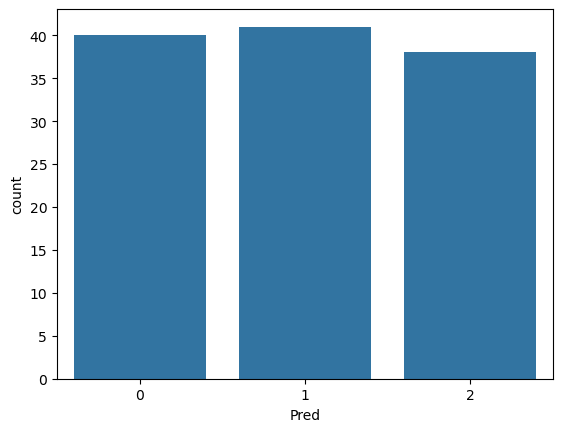

In [10]:
# Ver la distribución de las clases
sns.countplot(x='Pred', data=df)

Vemos que nuestros datos están bastante balanceados en sus clases por lo que no hay necesidad de emplear técnicas de Oversampling o Undersampling.

Se aplicó una técnica de reducción de dimensionalidad para poder visualizar cómo se agrupan las clases según sus características. Asó podemos ver si las distintas categorías se separan bien entre sí o si se mezclan, lo cual puede afectar el desempeño del modelo.

In [11]:
# Dividir nuestros datos en las variables y la objetivo
X = df.drop(['Pred'], axis=1) 
y = df['Pred'] # Variable objetivo

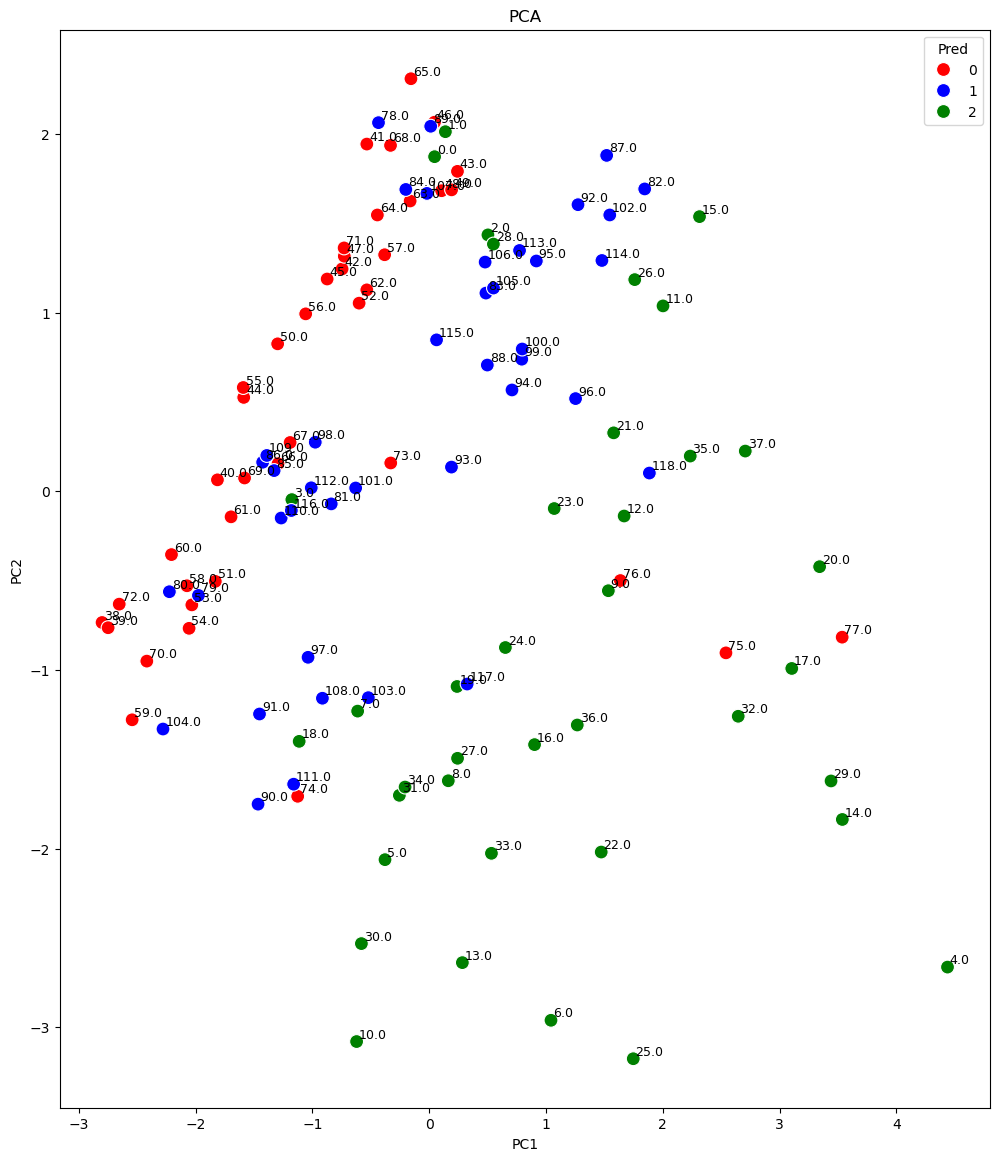

In [12]:
from sklearn.decomposition import PCA

# Centrar los datos 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA con 2 componentes para poder graficarlo
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Tranformar lo de PCA a un df
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Pred'] = y

# Añadir un indice para poder identificar que fila es del original
pca_df['Index'] = df.index

# Hacer el scatter y a cada punto anotar su indice
plt.figure(figsize=(12,14))
palette = {0: 'red', 1: 'blue', 2: 'green'}
sns.scatterplot(x='PC1', y='PC2', hue='Pred', palette=palette, data=pca_df, s=100)

for _, row in pca_df.iterrows():
    plt.text(row['PC1'] + 0.02, row['PC2'] + 0.02, str(row['Index']), fontsize=9)

plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Pred')
plt.show()

Se puede observar que algunas clases forman grupos bien definidos, como la clase 0 [Low], mientras que otras, como la clase 2 [High], son más dispersas. Aun así, sería posible trazar límites que separen a la mayoría de los grupos, aunque hay algunas muestras que se ubican dentro del grupo de otra clase. Estas muestras pueden considerarse como 'ruido', no necesariamente por sus características, sino por su ubicación en la gráfica, por eso decidimos retirarlos.

In [13]:
# Dropear las filas que son ruido
df_clean = df.drop(index=[78, 76, 77, 75, 74, 73, 21, 88, 118, 117, 90, 80, 86, 89, 3, 1, 0]).reset_index(drop=True)

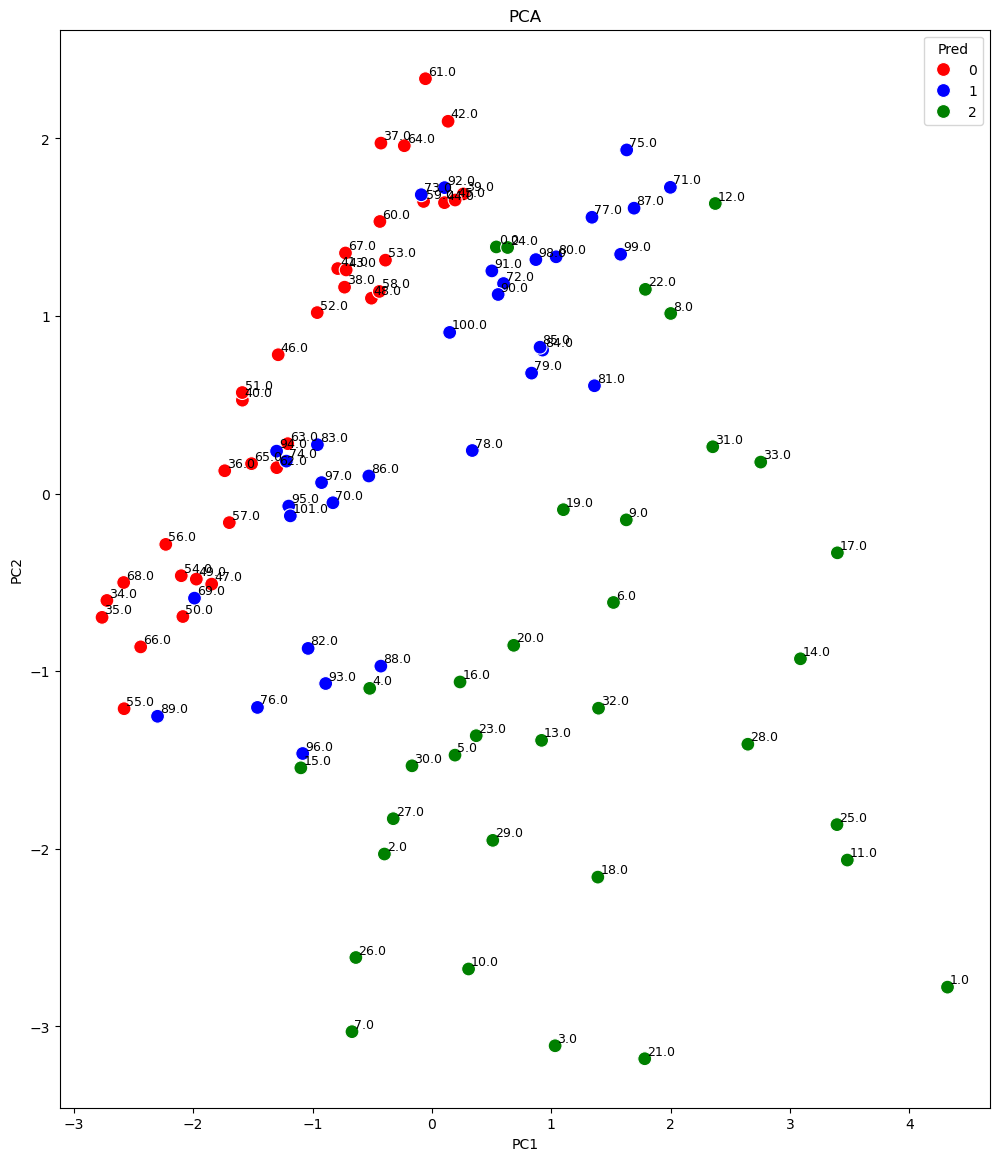

In [14]:
# Volver a separar los datos
X_clean = df_clean.drop('Pred', axis=1)
y_clean = df_clean['Pred']

# Centrarlos
scaler = StandardScaler()
X_scaled_clean = scaler.fit_transform(X_clean)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca_clean = pca.fit_transform(X_scaled_clean)

# Hacerlo dataframe
pca_df_clean = pd.DataFrame(X_pca_clean, columns=['PC1', 'PC2'])
pca_df_clean['Pred'] = y_clean
pca_df_clean['Index'] = df_clean.index  

# Hacer el scatter
plt.figure(figsize=(12,14))
palette = {0: 'red', 1: 'blue', 2: 'green'}
sns.scatterplot(x='PC1', y='PC2', hue='Pred', palette=palette, data=pca_df_clean, s=100)

for _, row in pca_df_clean.iterrows():
    plt.text(row['PC1'] + 0.02, row['PC2'] + 0.02, str(row['Index']), fontsize=9)

plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Pred')
plt.show()

Podemos ver que ya estan un poco más limpios.

## <font color= #bbc28d> **Caso 1 - Regresión Logística** </font>

In [15]:
# Dividirlo en conjunto de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=0, stratify=y_clean)

In [16]:
# Escalar los datos
sc = StandardScaler()

# Solo escalar las variables que originalmente eran numéricas
X_train_num = X_train[df_numericas]
X_test_num = X_test[df_numericas]

# Dividir en 2 los datos
X_train_cat = X_train.drop(columns=df_numericas)
X_test_cat = X_test.drop(columns=df_numericas)

# Entrenar y transformar
X_train_sc = pd.DataFrame(sc.fit_transform(X_train_num), columns=df_numericas, index=X_train.index)
X_test_sc = pd.DataFrame(sc.transform(X_test_num), columns=df_numericas, index=X_test.index)

# Juntar ambas partes
X_train_final = pd.concat([X_train_sc,X_train_cat], axis=1)
X_test_final = pd.concat([X_test_sc,X_test_cat], axis=1)

In [17]:
from sklearn.model_selection import GridSearchCV

# Lista de combinaciones válidas para los parámetros
param_grid = [
    {'penalty': ['l2'], 'C': np.linspace(1, 10, 15), 'solver': ['lbfgs','newton-cg','sag','saga', 'newton-cholesky','liblinear']},
    {'penalty': ['l1'], 'C': np.linspace(1, 10, 15), 'solver': ['liblinear', 'saga']}]

# Modelo base
logreg = LogisticRegression(max_iter=10000, multi_class="multinomial")

# Configurar GridSearchCV
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_macro', verbose=1)

# Ajustar el modelo
grid.fit(X_train_final, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros:", grid.best_params_)

# Mostrar el mejor puntaje promedio
print("Mejor puntaje promedio:", grid.best_score_)

# Obtener los resultados de la validación cruzada
cv_results_df = pd.DataFrame(grid.cv_results_)

# Filtrar los resultados del mejor modelo (el de menor 'rank_test_score' es el mejor)
best_mask = cv_results_df['rank_test_score'] == 1

# Extraer los puntajes por cada pliegue (fold) para el mejor conjunto de parámetros
fold_scores = [cv_results_df.loc[best_mask, f'split{i}_test_score'].values[0] for i in range(grid.cv)]

# Imprimir los puntajes por cada pliegue (fold)
for i, score in enumerate(fold_scores):
    print(f'Puntaje del pliegue {i+1}: {score:.4f}')

Fitting 5 folds for each of 120 candidates, totalling 600 fits


c:\Users\diana\anaconda3\envs\lab_modelado\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\diana\anaconda3\envs\lab_modelado\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\diana\anaconda3\envs\lab_modelado\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\diana\anaconda3\envs\lab_modelado\Lib\site-packages\sklearn\linear_model\

Mejores parámetros: {'C': 3.5714285714285716, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor puntaje promedio: 0.8847522847522848
Puntaje del pliegue 1: 0.9394
Puntaje del pliegue 2: 0.8771
Puntaje del pliegue 3: 0.8056
Puntaje del pliegue 4: 0.8690
Puntaje del pliegue 5: 0.9327


c:\Users\diana\anaconda3\envs\lab_modelado\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\diana\anaconda3\envs\lab_modelado\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\diana\anaconda3\envs\lab_modelado\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
225 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-----

In [18]:
# Predecir con el mejor modelo
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_final)

# Métricas
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.86      0.86      0.86         7
           2       1.00      0.86      0.92         7

    accuracy                           0.90        21
   macro avg       0.91      0.90      0.90        21
weighted avg       0.91      0.90      0.90        21


Matriz de confusión:
[[7 0 0]
 [1 6 0]
 [0 1 6]]


## <font color= #bbc28d> **Caso 2 - Support Vector Machine** </font>

`Realice un modelo de clasificación SVC considerando la base de datos “train_data.csv”`

Empezaremos por realizar un modelo base, sin tueno de hiperparámetros, y veremos como es su rendimiento, luego realizaremos el tuneo de hiperparámetros para ver si logramos un modelo con mejor rendimiento.

In [ ]:
# Modelo Base
svc_model = SVC()
svc_model.fit(X_train_final, y_train)

# Realizar las predicciones
y_pred = svc_model.predict(X_test_final)

In [20]:
# Métricas
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)
report_df = pd.DataFrame(report).transpose()

# Resultados
print("\n=== Classification Report ===")
print(report_df)
print("\n=== Confusion Matrix ===")
print(conf_matrix)


=== Classification Report ===
              precision    recall  f1-score    support
0              0.777778  1.000000  0.875000   7.000000
1              0.714286  0.714286  0.714286   7.000000
2              1.000000  0.714286  0.833333   7.000000
accuracy       0.809524  0.809524  0.809524   0.809524
macro avg      0.830688  0.809524  0.807540  21.000000
weighted avg   0.830688  0.809524  0.807540  21.000000

=== Confusion Matrix ===
[[7 0 0]
 [2 5 0]
 [0 2 5]]


### <font color=#8cbdaf> **SVC - KERNEL = 'linear'** </font>

In [21]:
# Crear el modelo
svc_model = SVC(kernel='linear', C=1.0, random_state=42)

# Entrenar con los datos
svc_model.fit(X_train_final, y_train)

# Realizar Predicciones
y_pred = svc_model.predict(X_test_final)

In [22]:
# Calcular métricas
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)
report_df = pd.DataFrame(report).transpose()

# Resultados
print("\n=== Classification Report ===")
print(report_df)
print("\n=== Confusion Matrix ===")
print(conf_matrix)


=== Classification Report ===
              precision    recall  f1-score    support
0              0.875000  1.000000  0.933333   7.000000
1              0.857143  0.857143  0.857143   7.000000
2              1.000000  0.857143  0.923077   7.000000
accuracy       0.904762  0.904762  0.904762   0.904762
macro avg      0.910714  0.904762  0.904518  21.000000
weighted avg   0.910714  0.904762  0.904518  21.000000

=== Confusion Matrix ===
[[7 0 0]
 [1 6 0]
 [0 1 6]]


### <font color=#8cbdaf> **Tuneo de Hiperparámetros - CV** </font>

Para evitar overfitting, underfitting y elegir un rango adecuado de hiperparámetros, se realizaron grafícas que muestran como cada valor dado a un `hiperparámetro X` afectan el rendimiento del modelo. Así, podemos visualizar y encontrar zonas donde el modelo se sobreajusta (cuando el puntaje en entrenamiento es alto pero bajo en prueba), cuándo ocurre underfitting (cuando no logra buen desempeño ni en entrenamiento ni en prueba) y cuándo esta balanceado [los resultados son consistentes en ambos casos].

### <font color=#8cbdaf> **SVC - KERNEL = 'rbf'** </font>

#### **`Valores de C en kernel rbf`**

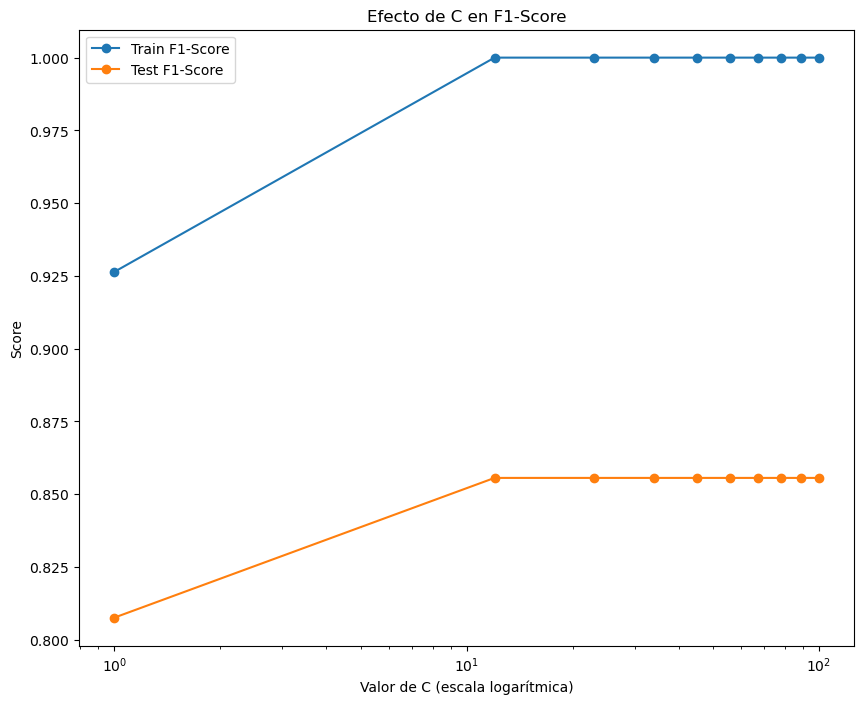

In [23]:
C_values =  np.linspace(1, 100, 10)  

train_f1_scores = []
test_f1_scores = []

for C in C_values:
    svc_clf = SVC(C=C, kernel='rbf')
    svc_clf.fit(X_train_final, y_train)
    
    # Predicciones
    train_pred = svc_clf.predict(X_train_final)
    test_pred = svc_clf.predict(X_test_final)
    
    # F1-Score
    train_f1 = f1_score(y_train, train_pred, average='weighted')
    test_f1 = f1_score(y_test, test_pred, average='weighted')
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    

# Graficar los resultados
plt.figure(figsize=(10, 8))
plt.plot(C_values, train_f1_scores, label='Train F1-Score', marker='o')
plt.plot(C_values, test_f1_scores, label='Test F1-Score', marker='o')
plt.xscale('log')
plt.xlabel('Valor de C (escala logarítmica)')
plt.ylabel('Score')
plt.title('Efecto de C en F1-Score')
plt.legend()
plt.show()

### <font color=#8cbdaf> **SVC - KERNEL = 'polinomial de grado 2'** </font>

#### **`Valores de C en kernel poly`**

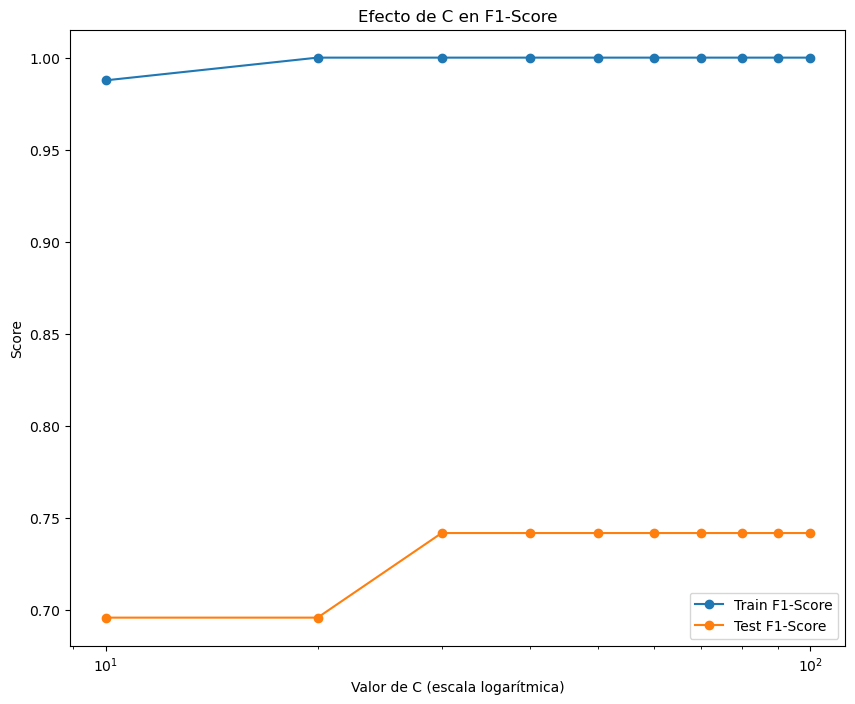

In [24]:
C_values =  np.linspace(10, 100, 10) 

train_f1_scores = []
test_f1_scores = []

for C in C_values:
    svc_clf = SVC(C=C, kernel='poly', degree=2)
    svc_clf.fit(X_train_final, y_train)
    
    # Predicciones
    train_pred = svc_clf.predict(X_train_final)
    test_pred = svc_clf.predict(X_test_final)
    
    # F1-Score
    train_f1 = f1_score(y_train, train_pred, average='weighted')
    test_f1 = f1_score(y_test, test_pred, average='weighted')
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    

# Graficar los resultados
plt.figure(figsize=(10, 8))
plt.plot(C_values, train_f1_scores, label='Train F1-Score', marker='o')
plt.plot(C_values, test_f1_scores, label='Test F1-Score', marker='o')
plt.xscale('log')
plt.xlabel('Valor de C (escala logarítmica)')
plt.ylabel('Score')
plt.title('Efecto de C en F1-Score')
plt.legend()
plt.show()

### <font color=#8cbdaf> **SVC - KERNEL = 'polinomial de grado 3'** </font>

#### **`Valores de C en kernel poly`**

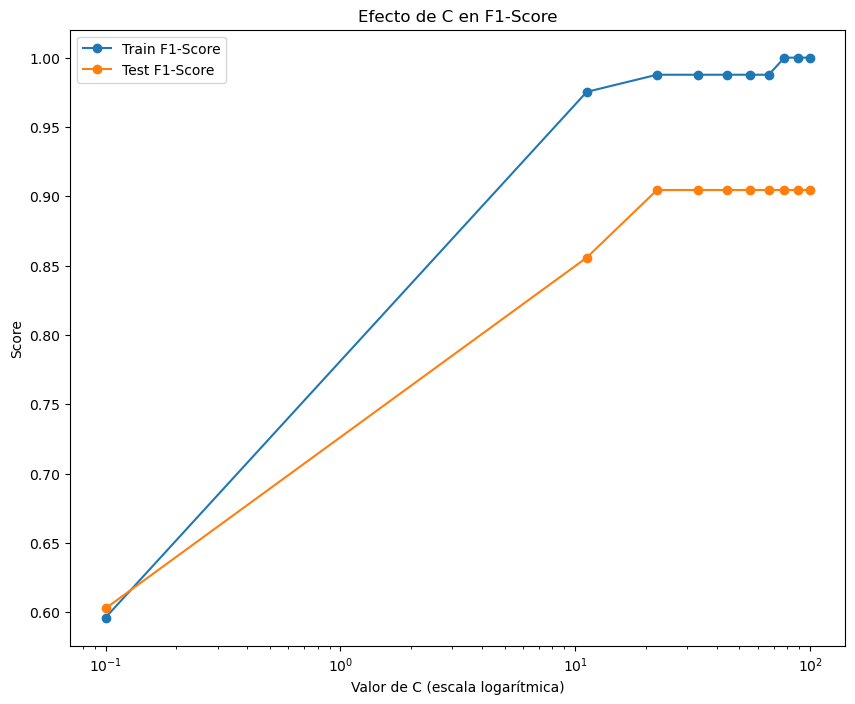

In [25]:
C_values = np.linspace(0.1, 100, 10)   

train_f1_scores = []
test_f1_scores = []

for C in C_values:
    svc_clf = SVC(C=C, kernel='poly', degree=3)
    svc_clf.fit(X_train_final, y_train)
    
    # Predicciones
    train_pred = svc_clf.predict(X_train_final)
    test_pred = svc_clf.predict(X_test_final)
    
    # F1-Score
    train_f1 = f1_score(y_train, train_pred, average='weighted')
    test_f1 = f1_score(y_test, test_pred, average='weighted')
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    

# Graficar los resultados
plt.figure(figsize=(10, 8))
plt.plot(C_values, train_f1_scores, label='Train F1-Score', marker='o')
plt.plot(C_values, test_f1_scores, label='Test F1-Score', marker='o')
plt.xscale('log')
plt.xlabel('Valor de C (escala logarítmica)')
plt.ylabel('Score')
plt.title('Efecto de C en F1-Score')
plt.legend()
plt.show()

### <font color=#8cbdaf> **SVC - KERNEL = 'sigmoid'** </font>

#### **`Valores de C en kernel sigmoide`**

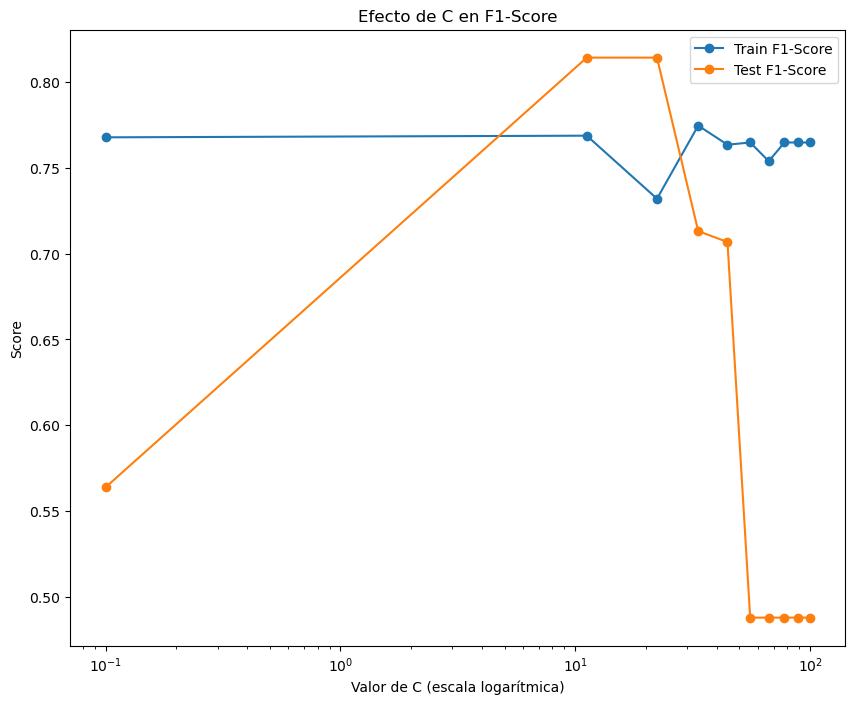

In [26]:
C_values = np.linspace(0.1, 100, 10)   

train_f1_scores = []
test_f1_scores = []

for C in C_values:
    svc_clf = SVC(C=C, kernel='sigmoid', probability=True)
    svc_clf.fit(X_train_final, y_train)
    
    # Predicciones
    train_pred = svc_clf.predict(X_train_final)
    test_pred = svc_clf.predict(X_test_final)
    
    # F1-Score
    train_f1 = f1_score(y_train, train_pred, average='weighted')
    test_f1 = f1_score(y_test, test_pred, average='weighted')
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    

# Graficar los resultados
plt.figure(figsize=(10, 8))
plt.plot(C_values, train_f1_scores, label='Train F1-Score', marker='o')
plt.plot(C_values, test_f1_scores, label='Test F1-Score', marker='o')
plt.xscale('log')
plt.xlabel('Valor de C (escala logarítmica)')
plt.ylabel('Score')
plt.title('Efecto de C en F1-Score')
plt.legend()
plt.show()

### <font color=#8cbdaf> **SVC - KERNEL = 'cosine'** </font>

#### **`Valores de C en kernel coseno`**

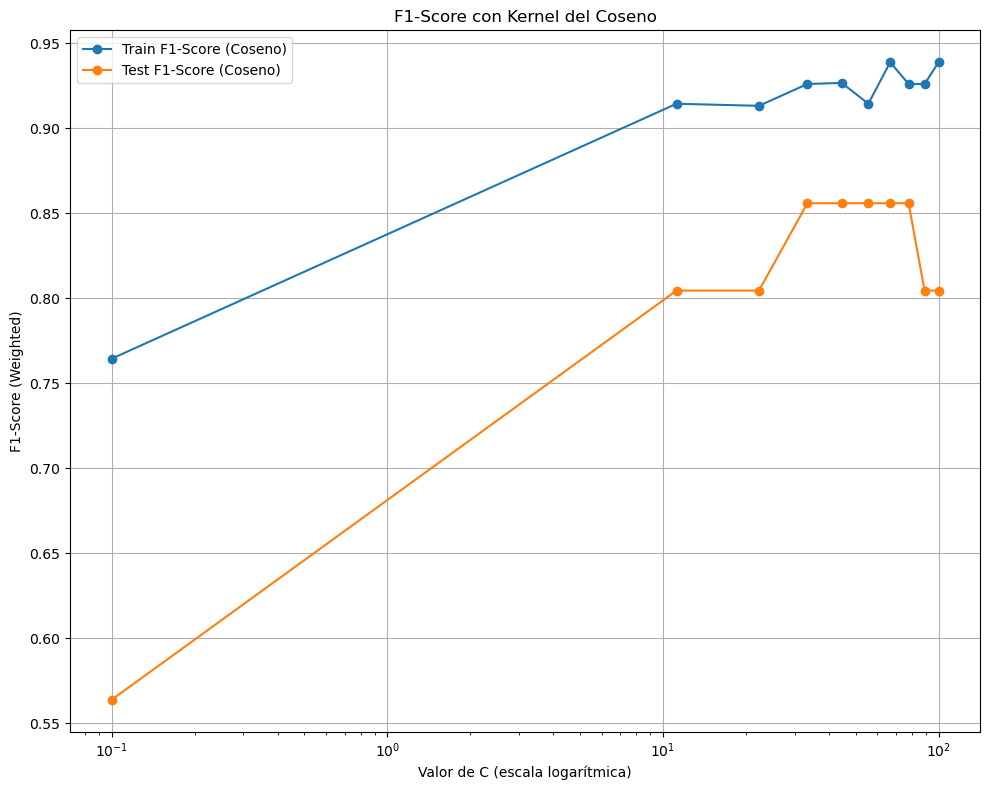

In [27]:
from sklearn.metrics import f1_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.svm import SVC
import matplotlib.pyplot as plt

C_values = np.linspace(0.1, 100, 10) 

train_f1_scores = []
test_f1_scores = []

for C in C_values:
    # Matriz de similitud (precomputed)
    K_train = cosine_similarity(X_train_final)
    K_test = cosine_similarity(X_test_final, X_train_final)

    svc_clf = SVC(C=C, kernel='precomputed')
    svc_clf.fit(K_train, y_train)

    # Predicciones
    train_pred = svc_clf.predict(K_train)
    test_pred = svc_clf.predict(K_test)

    # F1-Score
    train_f1 = f1_score(y_train, train_pred, average='weighted')
    test_f1 = f1_score(y_test, test_pred, average='weighted')

    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

# Gráfica
plt.figure(figsize=(10, 8))
plt.plot(C_values, train_f1_scores, label='Train F1-Score (Coseno)', marker='o')
plt.plot(C_values, test_f1_scores, label='Test F1-Score (Coseno)', marker='o')
plt.xscale('log')
plt.xlabel('Valor de C (escala logarítmica)')
plt.ylabel('F1-Score (Weighted)')
plt.title('F1-Score con Kernel del Coseno')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### <font color=#8cbdaf> **SVC - KERNEL = 'laplacian'** </font>

#### **`Valores de C en kernel laplaciano`**

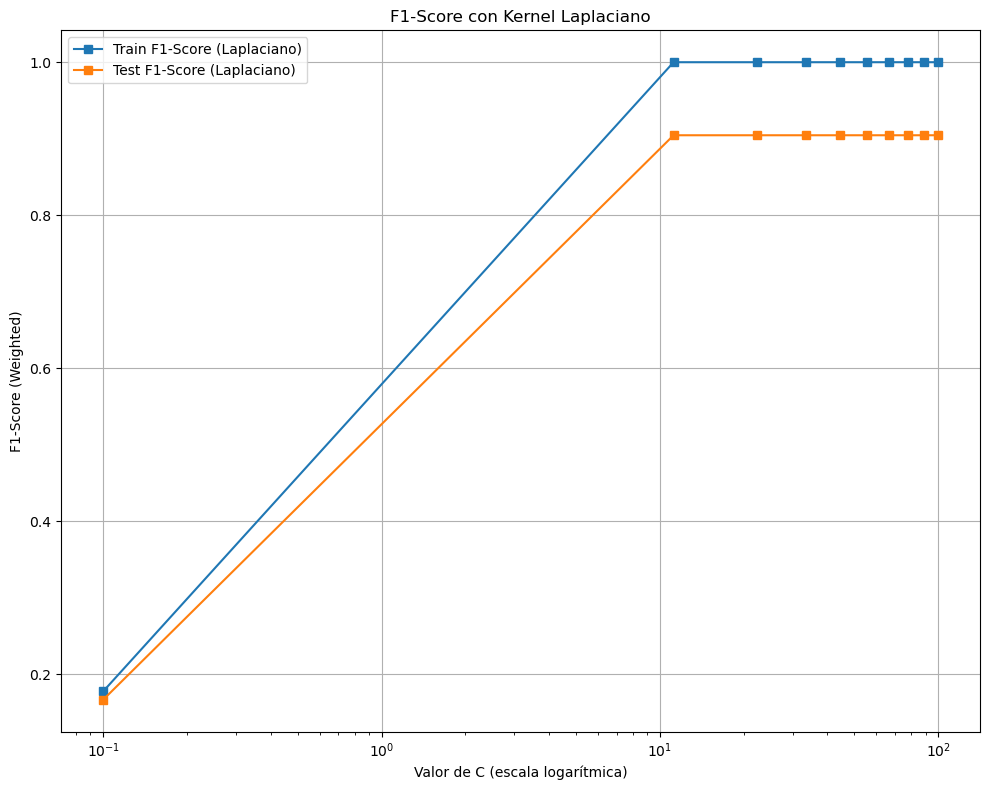

In [28]:
from sklearn.metrics import f1_score
from sklearn.metrics.pairwise import laplacian_kernel
from sklearn.svm import SVC
import matplotlib.pyplot as plt

C_values = np.linspace(0.1, 100, 10) 
gamma = 0.5  # puedes ajustarlo si quieres experimentar

train_f1_scores = []
test_f1_scores = []

for C in C_values:
    # Matriz de similitud (precomputed)
    K_train = laplacian_kernel(X_train_final, X_train_final, gamma=gamma)
    K_test = laplacian_kernel(X_test_final, X_train_final, gamma=gamma)

    svc_clf = SVC(C=C, kernel='precomputed')
    svc_clf.fit(K_train, y_train)

    # Predicciones
    train_pred = svc_clf.predict(K_train)
    test_pred = svc_clf.predict(K_test)

    # F1-Score
    train_f1 = f1_score(y_train, train_pred, average='weighted')
    test_f1 = f1_score(y_test, test_pred, average='weighted')

    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

# Gráfica
plt.figure(figsize=(10, 8))
plt.plot(C_values, train_f1_scores, label='Train F1-Score (Laplaciano)', marker='s')
plt.plot(C_values, test_f1_scores, label='Test F1-Score (Laplaciano)', marker='s')
plt.xscale('log')
plt.xlabel('Valor de C (escala logarítmica)')
plt.ylabel('F1-Score (Weighted)')
plt.title('F1-Score con Kernel Laplaciano')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


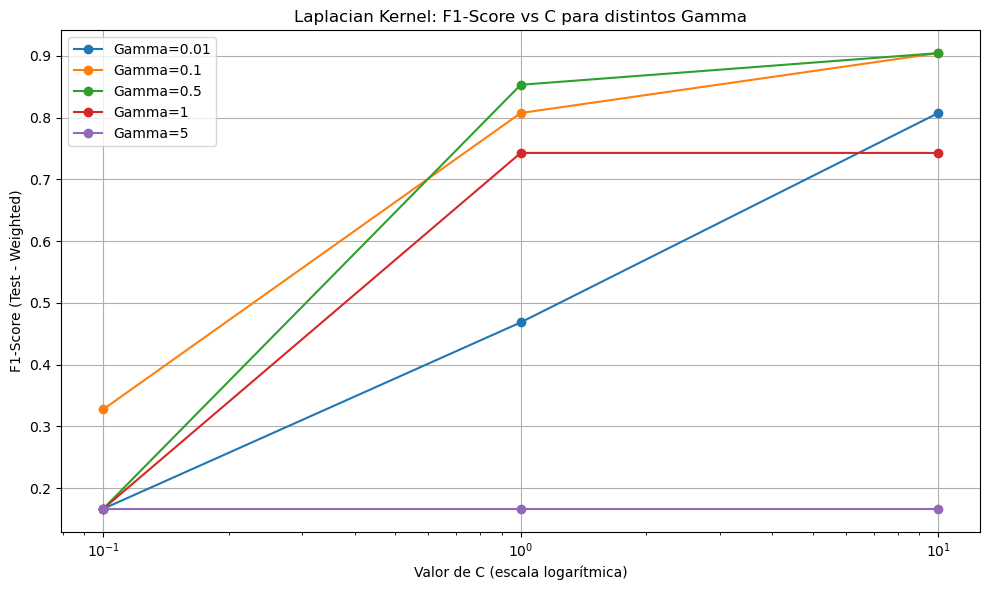

In [29]:
from sklearn.metrics import f1_score
from sklearn.metrics.pairwise import laplacian_kernel
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Valores de C y gamma a evaluar
C_values = [0.1, 1, 10]
gammas = [0.01, 0.1, 0.5, 1, 5]

# Guardamos resultados como: {(C, gamma): (train_f1, test_f1)}
results = {}

for gamma in gammas:
    train_f1_scores = []
    test_f1_scores = []

    for C in C_values:
        # Precomputed laplacian kernel
        K_train = laplacian_kernel(X_train_final, X_train_final, gamma=gamma)
        K_test = laplacian_kernel(X_test_final, X_train_final, gamma=gamma)

        model = SVC(C=C, kernel='precomputed')
        model.fit(K_train, y_train)

        y_train_pred = model.predict(K_train)
        y_test_pred = model.predict(K_test)

        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')

        results[(C, gamma)] = (train_f1, test_f1)

# Gráficas separadas por gamma
plt.figure(figsize=(10, 6))
for gamma in gammas:
    test_scores = [results[(C, gamma)][1] for C in C_values]
    plt.plot(C_values, test_scores, marker='o', label=f'Gamma={gamma}')

plt.xscale('log')
plt.xlabel('Valor de C (escala logarítmica)')
plt.ylabel('F1-Score (Test - Weighted)')
plt.title('Laplacian Kernel: F1-Score vs C para distintos Gamma')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


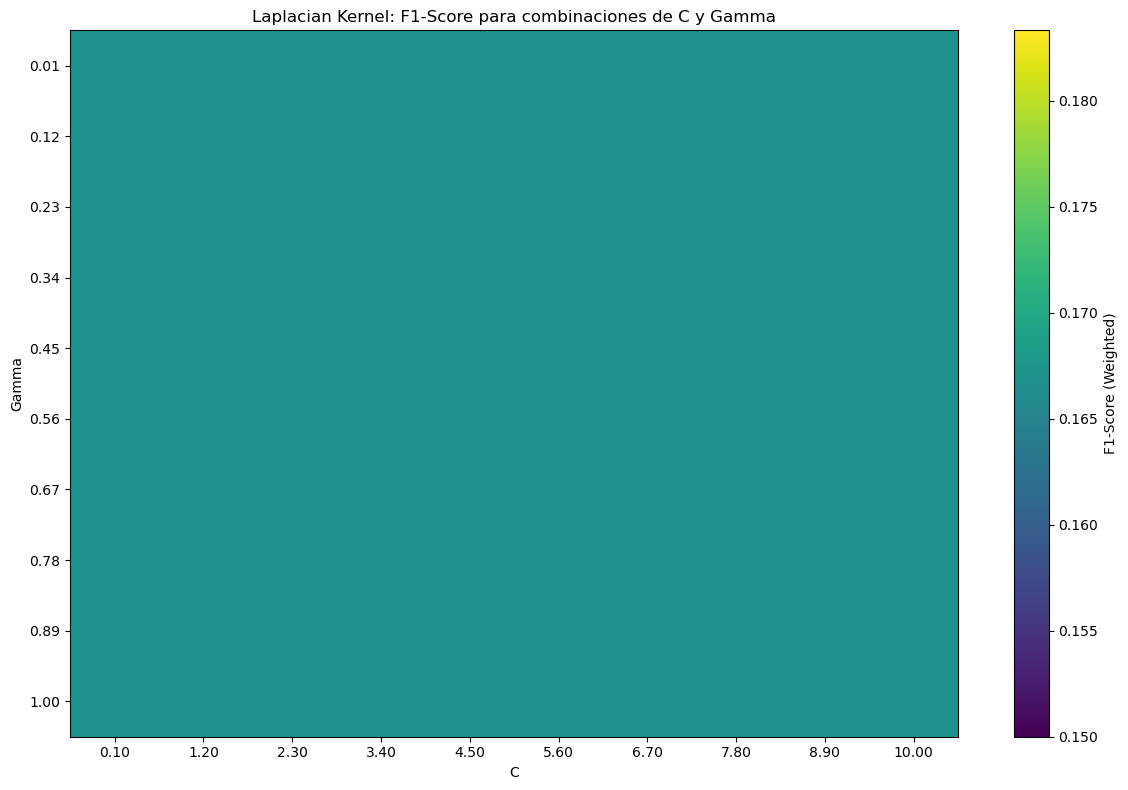

In [30]:
from sklearn.metrics.pairwise import laplacian_kernel
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# Valores continuos
C_values = np.linspace(0.1, 10, 10)     # 10 valores entre 0.1 y 10
gamma_values = np.linspace(0.01, 1, 10) # 10 valores entre 0.01 y 1

# Matriz para guardar resultados
f1_matrix = np.zeros((len(gamma_values), len(C_values)))

# Probar combinaciones
for i, gamma in enumerate(gamma_values):
    for j, C in enumerate(C_values):
        # Calcular kernel
        K_train = laplacian_kernel(X_train_final, X_train_final, gamma=gamma)
        K_test = laplacian_kernel(X_test, X_train_final, gamma=gamma)

        model = SVC(kernel='precomputed', C=C)
        model.fit(K_train, y_train)

        y_pred = model.predict(K_test)
        f1 = f1_score(y_test, y_pred, average='weighted')

        f1_matrix[i, j] = f1

# Heatmap de los resultados
plt.figure(figsize=(12, 8))
plt.imshow(f1_matrix, interpolation='nearest', cmap='viridis', aspect='auto')
plt.colorbar(label='F1-Score (Weighted)')
plt.xticks(ticks=np.arange(len(C_values)), labels=[f"{c:.2f}" for c in C_values])
plt.yticks(ticks=np.arange(len(gamma_values)), labels=[f"{g:.2f}" for g in gamma_values])
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('Laplacian Kernel: F1-Score para combinaciones de C y Gamma')
plt.tight_layout()
plt.show()


### <font color=#8cbdaf> **SVC - KERNEL = 'polinomial no homogéneo'** </font>

#### **`Valores de C en kernel poly no homogéneo`**

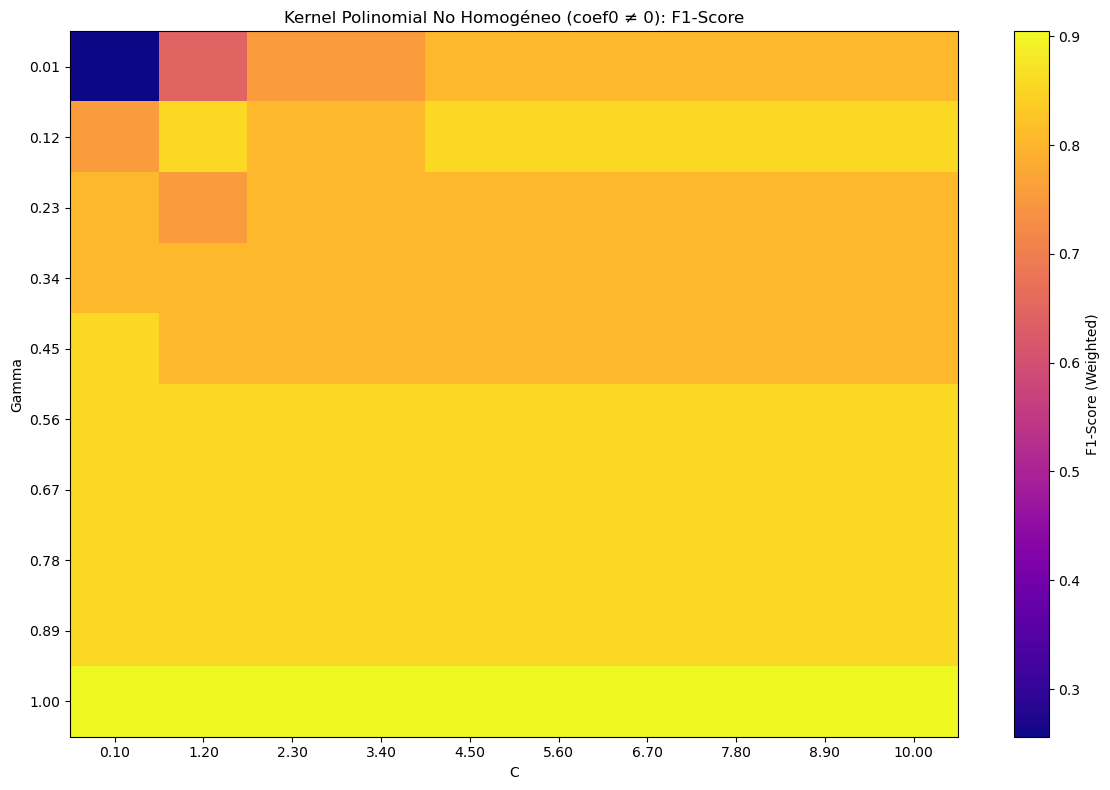

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# Valores de hiperparámetros
C_values = np.linspace(0.1, 10, 10)
gamma_values = np.linspace(0.01, 1, 10)
coef0 = 1  # Activamos el término no homogéneo
degree = 3 # Grado polinomial

# Matriz de resultados
f1_poly_matrix = np.zeros((len(gamma_values), len(C_values)))

# Entrenar para cada combinación
for i, gamma in enumerate(gamma_values):
    for j, C in enumerate(C_values):
        svc_poly = SVC(kernel='poly', C=C, gamma=gamma, coef0=coef0, degree=degree)
        svc_poly.fit(X_train_final, y_train)

        y_pred = svc_poly.predict(X_test_final)
        f1 = f1_score(y_test, y_pred, average='weighted')

        f1_poly_matrix[i, j] = f1

# Heatmap
plt.figure(figsize=(12, 8))
plt.imshow(f1_poly_matrix, interpolation='nearest', cmap='plasma', aspect='auto')
plt.colorbar(label='F1-Score (Weighted)')
plt.xticks(ticks=np.arange(len(C_values)), labels=[f"{c:.2f}" for c in C_values])
plt.yticks(ticks=np.arange(len(gamma_values)), labels=[f"{g:.2f}" for g in gamma_values])
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('Kernel Polinomial No Homogéneo (coef0 ≠ 0): F1-Score')
plt.tight_layout()
plt.show()


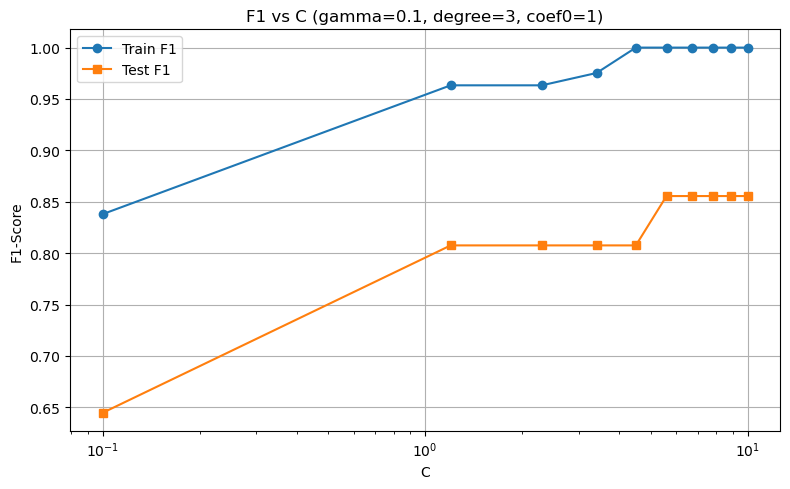

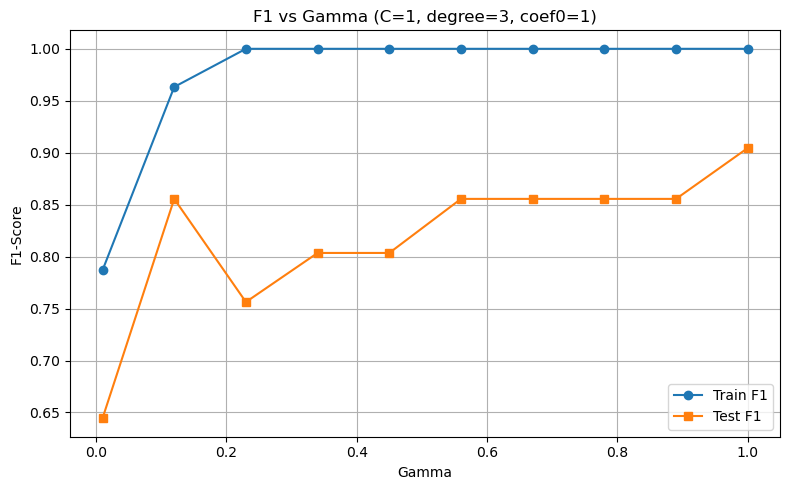

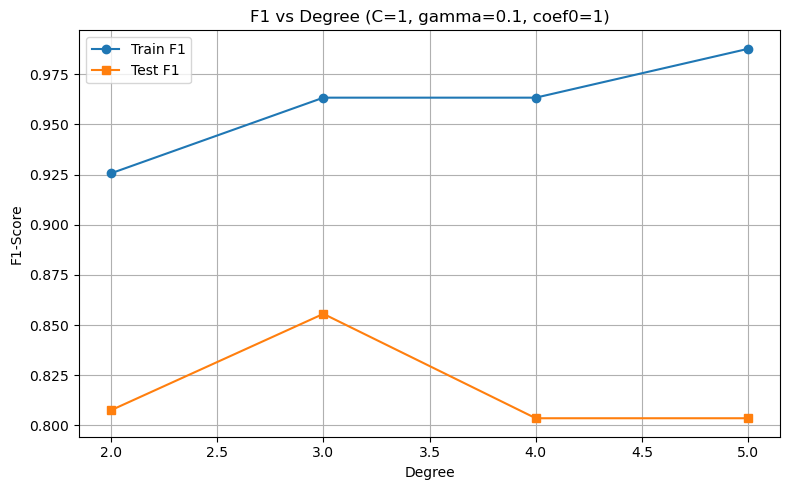

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

# Valores a probar
C_values = np.linspace(0.1, 10, 10)
gamma_values = np.linspace(0.01, 1, 10)
degree_values = [2, 3, 4, 5]

# Hiperparámetros fijos
coef0 = 1
fixed_gamma = 0.1
fixed_C = 1
fixed_degree = 3

# --- Gráfica 1: F1 vs C ---
f1_scores_c_train = []
f1_scores_c_test = []
for C in C_values:
    model = SVC(kernel='poly', C=C, gamma=fixed_gamma, coef0=coef0, degree=fixed_degree)
    model.fit(X_train_final, y_train)
    f1_train = f1_score(y_train, model.predict(X_train_final), average='weighted')
    f1_test = f1_score(y_test, model.predict(X_test_final), average='weighted')
    f1_scores_c_train.append(f1_train)
    f1_scores_c_test.append(f1_test)

plt.figure(figsize=(8, 5))
plt.plot(C_values, f1_scores_c_train, marker='o', label='Train F1')
plt.plot(C_values, f1_scores_c_test, marker='s', label='Test F1')
plt.xlabel('C')
plt.ylabel('F1-Score')
plt.title(f'F1 vs C (gamma={fixed_gamma}, degree={fixed_degree}, coef0={coef0})')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Gráfica 2: F1 vs Gamma ---
f1_scores_gamma_train = []
f1_scores_gamma_test = []
for gamma in gamma_values:
    model = SVC(kernel='poly', C=fixed_C, gamma=gamma, coef0=coef0, degree=fixed_degree)
    model.fit(X_train_final, y_train)
    f1_train = f1_score(y_train, model.predict(X_train_final), average='weighted')
    f1_test = f1_score(y_test, model.predict(X_test_final), average='weighted')
    f1_scores_gamma_train.append(f1_train)
    f1_scores_gamma_test.append(f1_test)

plt.figure(figsize=(8, 5))
plt.plot(gamma_values, f1_scores_gamma_train, marker='o', label='Train F1')
plt.plot(gamma_values, f1_scores_gamma_test, marker='s', label='Test F1')
plt.xlabel('Gamma')
plt.ylabel('F1-Score')
plt.title(f'F1 vs Gamma (C={fixed_C}, degree={fixed_degree}, coef0={coef0})')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Gráfica 3: F1 vs Degree ---
f1_scores_degree_train = []
f1_scores_degree_test = []
for degree in degree_values:
    model = SVC(kernel='poly', C=fixed_C, gamma=fixed_gamma, coef0=coef0, degree=degree)
    model.fit(X_train_final, y_train)
    f1_train = f1_score(y_train, model.predict(X_train_final), average='weighted')
    f1_test = f1_score(y_test, model.predict(X_test_final), average='weighted')
    f1_scores_degree_train.append(f1_train)
    f1_scores_degree_test.append(f1_test)

plt.figure(figsize=(8, 5))
plt.plot(degree_values, f1_scores_degree_train, marker='o', label='Train F1')
plt.plot(degree_values, f1_scores_degree_test, marker='s', label='Test F1')
plt.xlabel('Degree')
plt.ylabel('F1-Score')
plt.title(f'F1 vs Degree (C={fixed_C}, gamma={fixed_gamma}, coef0={coef0})')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### <font color=#8cbdaf> **Gridearch - SVC(poly no homogéneo)** </font>

Una vez delimitado el rango de valores que mostraron un buen balance entre los datos de entrenamiento y prueba, se realizó un `GridSearchCV` para identificar la combinación de hiperparámetros con mejor rendimiento. Esto se hizo ya que las gráficas anteriores se basaron únicamente en una partición fija de train/test, y nuevos datos podrían no seguir exactamente la misma distribución, y lo que queremos es un modelo que sea bueno generalizando.

In [33]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Rango más fino de hiperparámetros
param_grid_poly = {
    'C': np.linspace(0.1, 10, 10),       # 10 valores entre 0.1 y 10
    'gamma': np.linspace(0.01, 1, 10),   # 10 valores entre 0.01 y 1
    'degree': [2, 3, 4, 5],
    'coef0': np.linspace(1, 5, 5)        # 5 valores entre 1 y 5 (no homogéneo)
}

f1_scorer = make_scorer(f1_score, average='weighted')

svc_poly = SVC(kernel='poly')

grid_poly = GridSearchCV(svc_poly, param_grid=param_grid_poly, scoring=f1_scorer, cv=5, verbose=1)
grid_poly.fit(X_train_final, y_train)

print(" Mejor configuración (Poly No Homogéneo):")
print(grid_poly.best_params_)
print(f" Mejor F1-score en validación: {grid_poly.best_score_:.4f}")

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
 Mejor configuración (Poly No Homogéneo):
{'C': 1.2000000000000002, 'coef0': 4.0, 'degree': 5, 'gamma': 0.01}
 Mejor F1-score en validación: 0.9108


In [34]:
# Resultados de cada fold
results_df = pd.DataFrame(grid_poly.cv_results_)
best_idx = grid_poly.best_index_
results_df.loc[best_idx, ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]

split0_test_score    0.940171
split1_test_score    0.809295
split2_test_score    0.868304
split3_test_score    0.936432
split4_test_score         1.0
Name: 350, dtype: object

 Métricas del mejor modelo POLY:
Accuracy:  0.9048
Precision: 0.9107
Recall:    0.9048
F1-Score:  0.9045

 Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.86      0.86      0.86         7
           2       1.00      0.86      0.92         7

    accuracy                           0.90        21
   macro avg       0.91      0.90      0.90        21
weighted avg       0.91      0.90      0.90        21



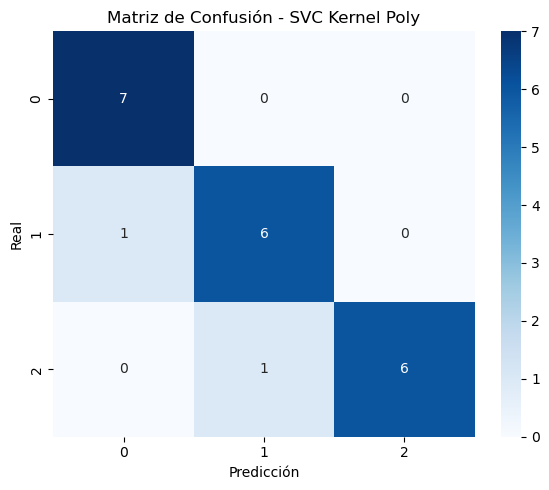

In [35]:
# Asume que estos son los mejores parámetros 
best_poly_model = SVC(
    kernel='poly',
    C=grid_poly.best_params_['C'],
    gamma=grid_poly.best_params_['gamma'],
    degree=grid_poly.best_params_['degree'],
    coef0=grid_poly.best_params_['coef0']
)

# Entrenar modelo
best_poly_model.fit(X_train_final, y_train)

# Predicción
y_pred = best_poly_model.predict(X_test_final)

# Métricas individuales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar métricas
print(f" Métricas del mejor modelo POLY:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Reporte de clasificación
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_poly_model.classes_, yticklabels=best_poly_model.classes_)
plt.title("Matriz de Confusión - SVC Kernel Poly")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


### <font color=#8cbdaf> **GUI para realizar predicciones** </font>

In [36]:
import joblib

# Guardar el scaler y las columnas numéricas
joblib.dump(sc, 'scaler.pkl')
joblib.dump(df_numericas.tolist(), 'cols_numericas.pkl')
joblib.dump(best_poly_model, 'svc_poly_model.pkl')

['svc_poly_model.pkl']

In [46]:
import gradio as gr
import numpy as np
import pandas as pd
import joblib

# Cargar todo
scaler = joblib.load('scaler.pkl')
num_cols = joblib.load('cols_numericas.pkl')
model = joblib.load('svc_poly_model.pkl')

# Columnas categóricas binarias
cat_map = {
    "Sex": {"Male": 1, "Female": 0},
    "Sm": {"Smoker": 1, "Non-smoker": 0},
    "Diabetes": {"Yes": 1, "No": 0}
}

# Diccionario de clases inverso
inv_target_map = {0: 'Low', 1: 'Medium', 2: 'High'}

# Función de predicción
def predecir_severidad(age, tch, hch, lch, tr, bps, sex, sm, diabetes):
    # Armar DataFrame de entrada
    input_dict = {
        'Age': age,
        'TCh': tch,
        'HCh': hch,
        'LCh': lch,
        'Tr': tr,
        'BPS': bps,
        'Sex': cat_map['Sex'][sex],
        'Sm': cat_map['Sm'][sm],
        'Diabetes': cat_map['Diabetes'][diabetes]
    }
    df_input = pd.DataFrame([input_dict])

    # Separar y escalar
    df_num = df_input[num_cols]
    df_cat = df_input.drop(columns=num_cols)

    df_scaled = pd.DataFrame(scaler.transform(df_num), columns=num_cols)
    df_final = pd.concat([df_scaled, df_cat.reset_index(drop=True)], axis=1)

    # Predecir
    pred = model.predict(df_final)[0]
    return f"Predicción: {inv_target_map[pred]}"

# UI de Gradio
gr.Interface(
    fn=predecir_severidad,
    inputs=[
        gr.Number(label="Edad"),
        gr.Number(label="TCh"),
        gr.Number(label="HCh"),
        gr.Number(label="LCh"),
        gr.Number(label="Tr"),
        gr.Number(label="BPS"),
        gr.Dropdown(choices=["Male", "Female"], label="Sexo"),
        gr.Dropdown(choices=["Smoker", "Non-smoker"], label="Fumador"),
        gr.Dropdown(choices=["Yes", "No"], label="Diabetes")
    ],
    outputs="text",
    title="Predicción de Severidad",
    description="Modelo SVC con kernel polinomial no homogéneo para predecir el nivel de severidad."
).launch(share=True)


* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


## <font color= #bbc28d> **Caso 2 - Las 2 features mas `relevantes`** </font>

Para poder determinar qué par de variables tienen mayor impacto y peso en la predicción del nivel de severidad, utilizaremos un **RFE (Recursive Feature Elimination)**. Elegimos este método porque, aunque técnicas *filter* como **SelectKBest** permiten identificar qué variables tienen mayor relación individual con la variable objetivo, `no consideran la interacción o combinación entre ellas`. Por ejemplo, si SelectKBest indica que las variables A y B son las más "importantes", no evalúa cómo se comportan juntas en el modelo; podría ocurrir que al usarlas en conjunto, una de ellas se vuelva redundante o irrelevante porque la otra explica mejor la variable objetivo. RFE, en cambio, permite iterativamente seleccionar el subconjunto de variables que, juntas, optimizan el desempeño del modelo.

RFE utiliza métricas para identificar la importancia de las características, como el atributo `.coef_` en modelos lineales y `.feature_importances_` en modelos basados en árboles. Aunque observamos que el modelo con kernel **rbf** era el "mejor" al evaluar todas las variables, este no tiene estos atributos, lo que dificulta la selección de características. Por esta razón, utilizaremos un SVC con kernel lineal. Este modelo será sencillo, puesto a que no buscamos realizar predicciones con estas dos variables, solamente deseamos ver la barrera de decisión.

### <font color=#8cbdaf> **RFE BASE** </font>

In [38]:
from sklearn.feature_selection import RFE

# Crear un modelo base para determinar cuales son las mejores 2 features para predecir
svc = SVC(kernel='linear')

# Objeto RFE
rfe = RFE(estimator=svc, n_features_to_select=2)

# Ajustar el RFE a los datos
rfe.fit(X_train_final, y_train)

# Resultados
print(f"Variables seleccionadas: {list(X_train_final.columns[rfe.support_])}")

Variables seleccionadas: ['HCh', 'Tr']


### <font color=#8cbdaf> **RFE - Preprocesamiento de los datos** </font>

In [ ]:
# Escalar los datos
sc = StandardScaler()

# Escalar las variables
X_train_num = X_train[['HCh','Tr']]
X_test_num = X_test[['HCh','Tr']]

# Entrenar y transformar
X_train_final= pd.DataFrame(sc.fit_transform(X_train_num), columns=[['HCh','Tr']], index=X_train.index)
X_test_final = pd.DataFrame(sc.transform(X_test_num), columns=[['HCh','Tr']], index=X_test.index)

In [52]:
# Modelo Base
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_final, y_train)

# Realizar las predicciones
y_pred = svc_model.predict(X_test_final)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar métricas
print(f"Métricas del modelo:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("\n=== Confusion Matrix ===")
print(conf_matrix)

Métricas del modelo:
Accuracy:  0.7619
Precision: 0.8009
Recall:    0.7619
F1-Score:  0.7563

=== Confusion Matrix ===
[[7 0 0]
 [2 5 0]
 [0 3 4]]


### <font color=#8cbdaf> **Predicciones y Gráfica del hiperplano** </font>

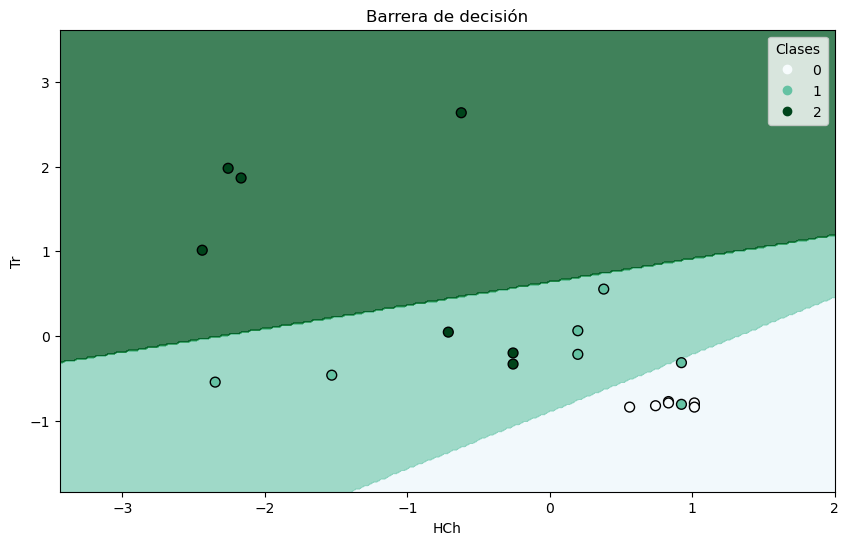

In [49]:
# Crear la mesh
h = .02 
x_min, x_max = X_test_final.iloc[:, 0].min() - 1, X_test_final.iloc[:, 0].max() + 1
y_min, y_max = X_test_final.iloc[:, 1].min() - 1, X_test_final.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predecir la clase para cada punto de la mesh
Z = svc_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Pltear la barrera de decisión y los puntos
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap='BuGn') 
scatter = plt.scatter(X_test_final.iloc[:, 0], X_test_final.iloc[:, 1], c=y_test, edgecolors='k', marker='o', s=50, cmap='BuGn')
plt.title("Barrera de decisión")
plt.xlabel('HCh')
plt.ylabel('Tr')
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Clases")
plt.show()